Device: cuda
Train size: 219
Test size: 132
Train classes: ['good']
Test classes: ['crack', 'faulty_imprint', 'good', 'poke', 'scratch', 'squeeze']


Epoch 001 | NLL: 8002.6698


Epoch 002 | NLL: -10732.6306


Epoch 003 | NLL: -17777.7077


Epoch 004 | NLL: -21350.1005


Epoch 005 | NLL: -24368.9846


Epoch 006 | NLL: -24755.8493


Epoch 007 | NLL: -25686.0999


Epoch 008 | NLL: -26540.8974


Epoch 009 | NLL: -27879.8194


Epoch 010 | NLL: -29276.7665


Epoch 011 | NLL: -30759.8312


Epoch 012 | NLL: -31199.0780


Epoch 013 | NLL: -32199.3922


Epoch 014 | NLL: -32183.4752


Epoch 015 | NLL: -32593.2809


Epoch 016 | NLL: -33496.9278


Epoch 017 | NLL: -34060.0686


Epoch 018 | NLL: -34516.0666


Epoch 019 | NLL: -34058.0484


Epoch 020 | NLL: -34421.3075


Epoch 021 | NLL: -34979.4353


Epoch 022 | NLL: -35185.3468


Epoch 023 | NLL: -35813.3222


Epoch 024 | NLL: -35893.3286


Epoch 025 | NLL: -36307.6984


Epoch 026 | NLL: -35802.8978


Epoch 027 | NLL: -36694.9807


Epoch 028 | NLL: -36537.1974


Epoch 029 | NLL: -36712.8636


Epoch 030 | NLL: -37217.0352


Epoch 031 | NLL: -37356.8216


Epoch 032 | NLL: -37406.1175


Epoch 033 | NLL: -37156.3580


Epoch 034 | NLL: -37733.1246


Epoch 035 | NLL: -38009.0339


Epoch 036 | NLL: -37785.3854


Epoch 037 | NLL: -38146.5147


Epoch 038 | NLL: -37691.7321


Epoch 039 | NLL: -37874.1121


Epoch 040 | NLL: -38444.9216


Epoch 041 | NLL: -38347.2013


Epoch 042 | NLL: -38189.4421


Epoch 043 | NLL: -37997.2137


Epoch 044 | NLL: -38412.5574


Epoch 045 | NLL: -38452.9781


Epoch 046 | NLL: -38989.6308


Epoch 047 | NLL: -39109.1359


Epoch 048 | NLL: -39191.9153


Epoch 049 | NLL: -39161.4984


Epoch 050 | NLL: -39320.2724


Epoch 051 | NLL: -39199.8088


Epoch 052 | NLL: -38882.7995


Epoch 053 | NLL: -39761.1920


Epoch 054 | NLL: -39393.9311


Epoch 055 | NLL: -39374.3250


Epoch 056 | NLL: -38921.6507


Epoch 057 | NLL: -39462.5696


Epoch 058 | NLL: -39773.5798


Epoch 059 | NLL: -40101.4730


Epoch 060 | NLL: -39991.9030


Epoch 061 | NLL: -39709.4407


Epoch 062 | NLL: -40063.4138


Epoch 063 | NLL: -40016.4875


Epoch 064 | NLL: -40448.6826


Epoch 065 | NLL: -40083.0441


Epoch 066 | NLL: -40562.8162


Epoch 067 | NLL: -40402.4592


Epoch 068 | NLL: -40802.5341


Epoch 069 | NLL: -40581.8176


Epoch 070 | NLL: -40834.5538


Epoch 071 | NLL: -40754.9312


Epoch 072 | NLL: -40901.7123


Epoch 073 | NLL: -40882.6944


Epoch 074 | NLL: -40678.0543


Epoch 075 | NLL: -40993.2195


Epoch 076 | NLL: -40795.1768


Epoch 077 | NLL: -41198.9482


Epoch 078 | NLL: -40714.7461


Epoch 079 | NLL: -41083.6091


Epoch 080 | NLL: -41438.3813


Epoch 081 | NLL: -41379.5944


Epoch 082 | NLL: -41317.4229


Epoch 083 | NLL: -41410.4325


Epoch 084 | NLL: -41542.0626


Epoch 085 | NLL: -41004.1257


Epoch 086 | NLL: -41482.8378


Epoch 087 | NLL: -41480.2349


Epoch 088 | NLL: -41493.1876


Epoch 089 | NLL: -41773.3547


Epoch 090 | NLL: -41713.9445


Epoch 091 | NLL: -41402.0036


Epoch 092 | NLL: -40995.2318


Epoch 093 | NLL: -41586.3698


Epoch 094 | NLL: -41648.2748


Epoch 095 | NLL: -41905.9755


Epoch 096 | NLL: -41845.0071


Epoch 097 | NLL: -42031.7240


Epoch 098 | NLL: -42082.2888


Epoch 099 | NLL: -41956.0682


Epoch 100 | NLL: -42192.3977

Total Training Time (minutes): 46.2584404706955


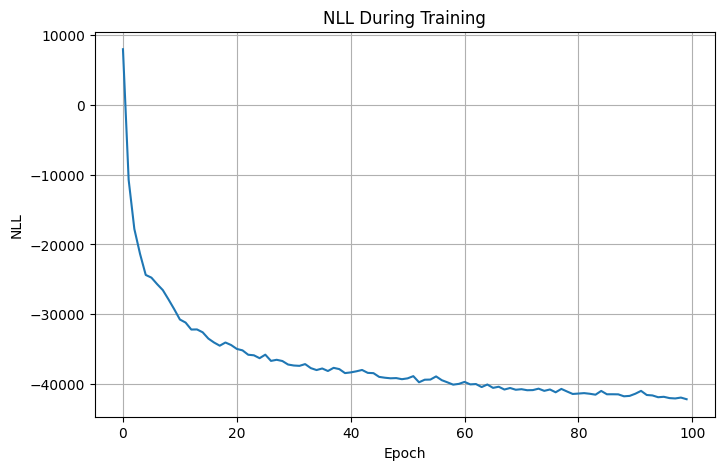


Time per image:
Image 1: 266.72 sec
Image 2: 266.84 sec
Image 3: 266.95 sec
Image 4: 266.83 sec
Image 5: 266.80 sec

Total sampling time: 1334.14 seconds


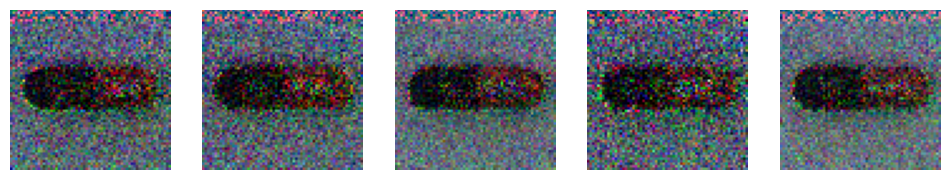

In [1]:
# ============================================
#         IMPORTS
# ============================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

# ============================================
#         DATASET
# ============================================
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

root = r"C:/Users/Master Arian/Desktop/DGM2/capsule"

train_ds = datasets.ImageFolder(root + "/train", transform=transform)
test_ds  = datasets.ImageFolder(root + "/test",  transform=transform)

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=8, shuffle=False)

dim = 64 * 64 * 3

print("Train size:", len(train_ds))
print("Test size:", len(test_ds))
print("Train classes:", train_ds.classes)
print("Test classes:", test_ds.classes)

# ============================================
#         MASKED LINEAR
# ============================================
class MaskedLinear(nn.Linear):
    def __init__(self, in_features, out_features):
        super().__init__(in_features, out_features)
        self.register_buffer("mask", torch.ones(out_features, in_features))

    def set_mask(self, mask):
        self.mask.data.copy_(mask)

    def forward(self, x):
        return F.linear(x, self.weight * self.mask, self.bias)

# ============================================
#                   MADE
# ============================================
class MADE(nn.Module):
    def __init__(self, dim, hidden=512):
        super().__init__()
        self.dim = dim

        self.fc1 = MaskedLinear(dim, hidden)
        self.fc2 = MaskedLinear(hidden, hidden)
        self.fc3 = MaskedLinear(hidden, 2 * dim)

        self.net = nn.Sequential(
            self.fc1, nn.ReLU(),
            self.fc2, nn.ReLU(),
            self.fc3
        )
        self.create_masks()

    def create_masks(self):
        dim = self.dim
        hidden = self.fc1.out_features

        m0 = torch.arange(1, dim + 1)
        m1 = torch.randint(1, dim, (hidden,))
        m2 = torch.randint(1, dim, (hidden,))
        m3 = torch.cat([torch.arange(1, dim + 1),
                        torch.arange(1, dim + 1)])

        self.fc1.set_mask((m1.unsqueeze(1) >= m0.unsqueeze(0)).float())
        self.fc2.set_mask((m2.unsqueeze(1) >= m1.unsqueeze(0)).float())
        self.fc3.set_mask((m3.unsqueeze(1) >= m2.unsqueeze(0)).float())

    def forward(self, x):
        out = self.net(x)
        mean, log_scale = out.chunk(2, dim=1)
        log_scale = torch.clamp(log_scale, -5, 5)
        return mean, log_scale

# ============================================
#                MAF BLOCK
# ============================================
class MAFBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.made = MADE(dim)

    def forward(self, x):
        mean, log_scale = self.made(x)
        z = (x - mean) * torch.exp(-log_scale)
        log_det = -log_scale.sum(dim=1)
        return z, log_det

    def inverse(self, z):
        x = torch.zeros_like(z)
        for i in range(z.shape[1]):
            mean, log_scale = self.made(x)
            log_scale = torch.clamp(log_scale, -5, 5)
            x[:, i] = z[:, i] * torch.exp(log_scale[:, i]) + mean[:, i]
        return x

# ============================================
#                 FULL MAF
# ============================================
class MAF(nn.Module):
    def __init__(self, dim, n_flows=7):
        super().__init__()
        self.dim = dim
        self.flows = nn.ModuleList([MAFBlock(dim) for _ in range(n_flows)])
        self.base = torch.distributions.MultivariateNormal(
            torch.zeros(dim).to(device),
            torch.eye(dim).to(device)
        )

    def forward(self, x):
        z = x
        log_det_sum = 0

        for flow in self.flows:
            z, log_det = flow(z)
            log_det_sum += log_det

        return self.base.log_prob(z) + log_det_sum

    @torch.no_grad()
    def sample(self, n):
        z = self.base.sample((n,)).to(device)
        x = z
        for flow in reversed(self.flows):
            x = flow.inverse(x)
        return x

# ============================================
#         MODEL + OPTIMIZER
# ============================================
model = MAF(dim=dim, n_flows=7).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

def preprocess(x):
    return x.view(x.size(0), -1)

# ============================================
#               TRAIN LOOP
# ============================================
train_losses = []
start_train = time.time()

def train_epoch():
    model.train()
    total = 0

    for x,_ in tqdm(train_loader, desc="Train", leave=False):
        x = preprocess(x.to(device))
        log_px = model(x)
        loss = -log_px.mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total += loss.item() * x.size(0)

    return total / len(train_ds)

for epoch in range(1, 101):
    loss = train_epoch()
    train_losses.append(loss)
    print(f"Epoch {epoch:03d} | NLL: {loss:.4f}")

end_train = time.time()
print("\nTotal Training Time (minutes):", (end_train - start_train)/60)

# ============================================
#                TRAINING PLOT
# ============================================
plt.figure(figsize=(8,5))
plt.plot(train_losses)
plt.grid()
plt.title("NLL During Training")
plt.xlabel("Epoch")
plt.ylabel("NLL")
plt.show()

# ============================================
#           SAMPLING 5 IMAGES + TIME
# ============================================
model.eval()
samples = []
times = []

with torch.no_grad():
    total_start = time.time()

    for i in range(5):
        start = time.time()
        x = model.sample(1)
        x = x.view(3,64,64).clamp(0,1).cpu()
        samples.append(x)
        end = time.time()
        times.append(end - start)

    total_end = time.time()

print("\nTime per image:")
for i,t in enumerate(times):
    print(f"Image {i+1}: {t:.2f} sec")

print(f"\nTotal sampling time: {total_end-total_start:.2f} seconds")

# ============================================
#              SHOW SAMPLES
# ============================================
plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(samples[i].permute(1,2,0).numpy())
    plt.axis("off")
plt.show()


In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

root = r"C:/Users/Master Arian/Desktop/DGM2/capsule"
test_ds = datasets.ImageFolder(root + "/test", transform=transform)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

print("Test classes:", test_ds.classes)
good_idx = test_ds.class_to_idx["good"]
print("Index of 'good' class:", good_idx)


Test classes: ['crack', 'faulty_imprint', 'good', 'poke', 'scratch', 'squeeze']
Index of 'good' class: 2


In [7]:
import numpy as np

model.eval()

all_scores = []       # NLL
all_labels = []       # 0 = normal, 1 = anomaly
all_class_names = []  # برای تحلیل جداگانه هر کلاس عیب

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        x = x.view(x.size(0), -1)   # ← مهم: تبدیل به [batch, 12288]

        log_px = model(x)
        nll = (-log_px).cpu().numpy()

        y_np = y.numpy()
        labels_batch = (y_np != good_idx).astype(int)

        all_scores.extend(nll.tolist())
        all_labels.extend(labels_batch.tolist())

        for idx in y_np:
            all_class_names.append(test_ds.classes[idx])


all_scores = np.array(all_scores)
all_labels = np.array(all_labels)

print("Total test samples:", len(all_scores))
print("Normal samples:", (all_labels == 0).sum())
print("Anomalies:", (all_labels == 1).sum())


Total test samples: 132
Normal samples: 23
Anomalies: 109


In [15]:
print("Test classes:", test_ds.classes)

# شمارش تعداد good در تست
count_good = sum(1 for _, label in test_ds.samples if label == good_idx)
print("Number of GOOD images in test:", count_good)

# شمارش هر کلاس
from collections import Counter
labels_all = [label for _, label in test_ds.samples]
print("Count per class:", Counter(labels_all))


Test classes: ['crack', 'faulty_imprint', 'good', 'poke', 'scratch', 'squeeze']
Number of GOOD images in test: 23
Count per class: Counter({0: 23, 2: 23, 4: 23, 1: 22, 3: 21, 5: 20})


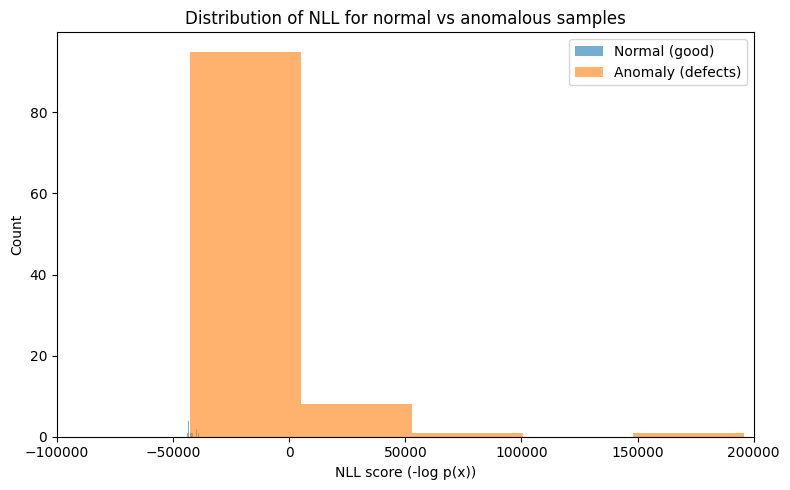

Mean NLL normal: -41544.737432065216
Mean NLL anomaly: -2790.2386217029816


In [19]:
import matplotlib.pyplot as plt

normal_scores = all_scores[all_labels == 0]
anomaly_scores = all_scores[all_labels == 1]

plt.figure(figsize=(8,5))
plt.hist(normal_scores, bins=40, alpha=0.6, label="Normal (good)")
plt.hist(anomaly_scores, bins=40, alpha=0.6, label="Anomaly (defects)")
plt.xlabel("NLL score (-log p(x))")
plt.ylabel("Count")
plt.title("Distribution of NLL for normal vs anomalous samples")
plt.legend()

plt.xlim([-100000, 200000])   # مهم ترین خط

plt.tight_layout()
plt.show()



print("Mean NLL normal:", normal_scores.mean())
print("Mean NLL anomaly:", anomaly_scores.mean())




In [12]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 324.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 330.3 kB/s eta 0:00:27
   ---------------------------------------- 0.0/8.9 MB 330.3 kB/s eta 0:00:27
   ---------------------------------------- 0.0/8.9 MB 217.9 kB/s eta 0:00:41
   ---------------------------------------- 0.1/8.9 MB 233.8 kB/s eta 0:00:38
   --------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


AUROC: 0.78540087754288


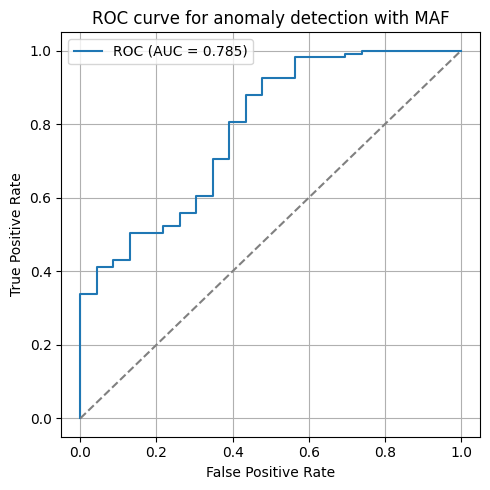

Best threshold on NLL: -42030.65625
Confusion matrix (rows: true, cols: pred):
[[ 12  11]
 [  8 101]]

Classification report:
              precision    recall  f1-score   support

      normal       0.60      0.52      0.56        23
     anomaly       0.90      0.93      0.91       109

    accuracy                           0.86       132
   macro avg       0.75      0.72      0.74       132
weighted avg       0.85      0.86      0.85       132



In [13]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# labels: 0 = normal, 1 = anomaly
scores = all_scores
labels = all_labels

auc = roc_auc_score(labels, scores)
fpr, tpr, thresholds = roc_curve(labels, scores)

print("AUROC:", auc)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for anomaly detection with MAF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# پیدا کردن بهترین آستانه با بیشینه کردن TPR - FPR
youden = tpr - fpr
best_idx = np.argmax(youden)
best_thr = thresholds[best_idx]
print("Best threshold on NLL:", best_thr)

# ساخت پیش‌بینی باینری
preds = (scores >= best_thr).astype(int)

cm = confusion_matrix(labels, preds)
print("Confusion matrix (rows: true, cols: pred):")
print(cm)

print("\nClassification report:")
print(classification_report(labels, preds, target_names=["normal", "anomaly"]))


In [14]:
class_scores = {name: [] for name in test_ds.classes}

for score, cname in zip(all_scores, all_class_names):
    class_scores[cname].append(score)

print("Average NLL per class:")
for cname, scores_c in class_scores.items():
    scores_c = np.array(scores_c)
    print(f"{cname:15s}  n={len(scores_c):4d}  mean={scores_c.mean():.2f}  std={scores_c.std():.2f}")


Average NLL per class:
crack            n=  23  mean=48022.34  std=388252.19
faulty_imprint   n=  22  mean=-40550.09  std=1533.63
good             n=  23  mean=-41544.74  std=1601.26
poke             n=  21  mean=-39992.05  std=2396.78
scratch          n=  23  mean=-39693.68  std=2506.29
squeeze          n=  20  mean=61811.99  std=120271.18
